# 二维模型插值

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.axes_grid1 import make_axes_locatable

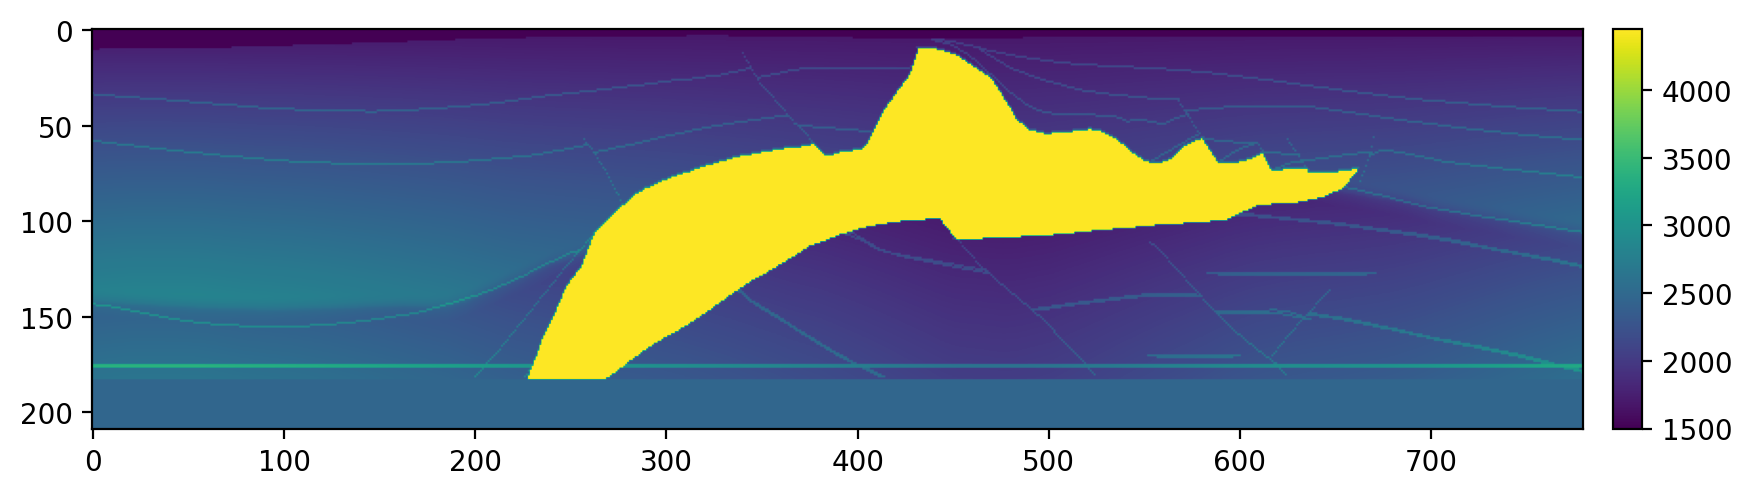

In [79]:
vel=np.load('./SEG-Salt-3D-Model-2D-Sclice-aa.npy')
fig=plt.figure(figsize=(10,10),dpi=200)
ax=fig.add_subplot(1,1,1)
im=ax.imshow(vel)
ax_divider=make_axes_locatable(ax)
cax=ax_divider.append_axes('right',size='2%',pad='2%')
fig.colorbar(im,cax=cax)

In [80]:
dx=20
nz=vel.shape[0]
nx=vel.shape[1]
zlenth=(nz-1)*dx
xlenth=(nx-1)*dx
z=np.linspace(0,zlenth,nz)
x=np.linspace(0,xlenth,nx)
zg,xg=np.meshgrid(z,x,indexing='ij')
interp=RegularGridInterpolator((z,x),vel,method='linear')

In [81]:
dx_interp=5
nz_interp=int(zlenth/dx_interp)+1
nx_interp=int(xlenth/dx_interp)+1
zp=np.linspace(0,zlenth,nz_interp)
xp=np.linspace(0,xlenth,nx_interp)
zpg,xpg=np.meshgrid(zp,xp,indexing='ij')

In [82]:
vel_interp=interp((zpg,xpg))

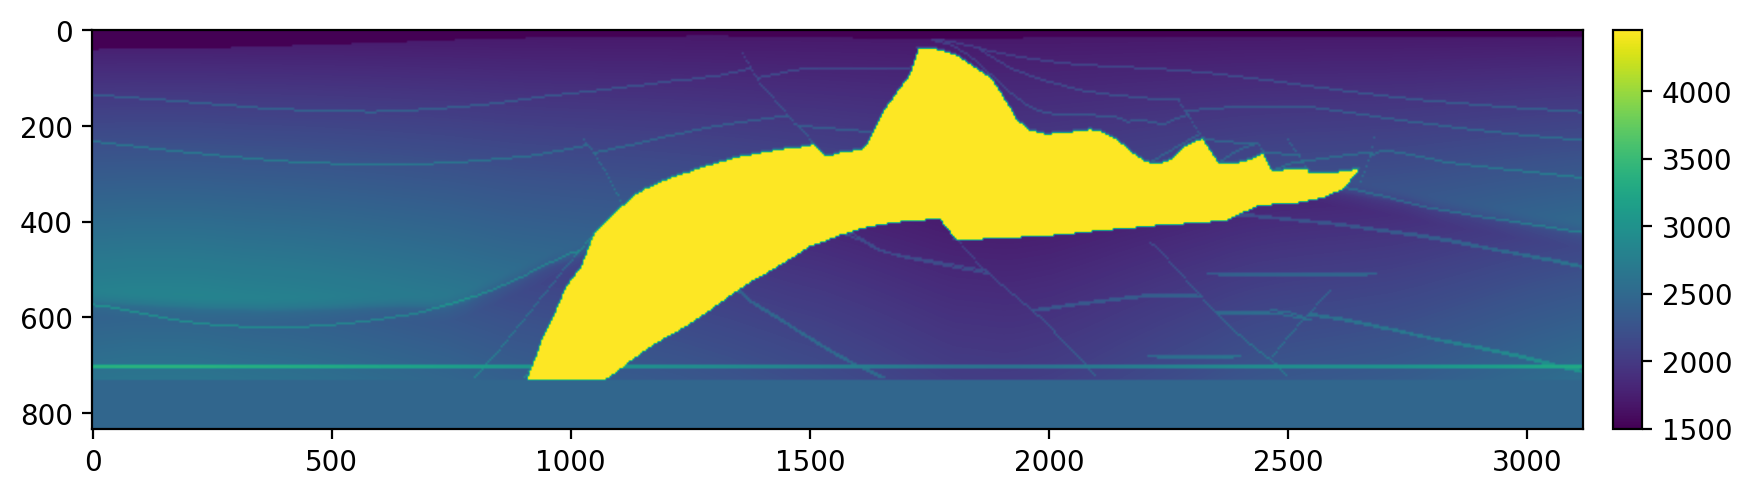

In [83]:
fig=plt.figure(figsize=(10,10),dpi=200)
ax=fig.add_subplot(1,1,1)
im=ax.imshow(vel_interp)
ax_divider=make_axes_locatable(ax)
cax=ax_divider.append_axes('right',size='2%',pad='2%')
fig.colorbar(im,cax=cax)

In [84]:
np.save('SEG-Salt-3D-Model-2D-Sclice-aa-interp-5m',vel_interp)
np.savetxt('SEG-Salt-3D-Model-2D-Sclice-aa-interp-5m.csv',vel_interp)